In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

read adverstisement samples file

In [20]:
dataset = pd.read_csv("Ads_Optimisation.csv")
print(dataset.head())

runtime_rewards = dataset.to_numpy()

true_rewards = np.mean(runtime_rewards, axis=0)
runtime_rewards = runtime_rewards.transpose()

steps = runtime_rewards.shape[1]

   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


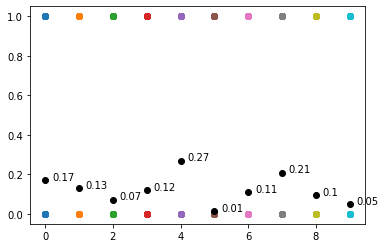

In [21]:
action_indices = np.arange(0,10)
for index in action_indices :
    plt.scatter(np.full((10000),index),runtime_rewards[index])
    plt.text(index+0.2,true_rewards[index],str(round(true_rewards[index],2)))
plt.plot(action_indices, true_rewards,'o', color='black')
plt.show()

number of advertisements / similar to number of leavers in Bandit machine problem

In [22]:
def epsilon_greedy(epsilon):
    N = 10000
    d = 10
    ads_selected = []
    # keep track of how many times actions are taken
    numbers_of_selections = [1] * d
    sums_of_reward = [0] * d
    # keep track of total reward (q function)
    total_reward = 0

    for n in range(0, N):
        ad = 0
        max_q_value = 0
        for i in range(0, d):
            rand = np.random.uniform(0, 1) 
            if rand <= epsilon:
                ad = random.randrange(d)
            else:
                # calculate q(a) or avg reward of all rewards for choosing ad i divided by number of times choosing ad i
                q_val = sums_of_reward[i] / numbers_of_selections[i]
                if q_val > max_q_value:
                    max_q_value = q_val
                    ad = i   
        ads_selected.append(ad)
        numbers_of_selections[ad] += 1
        reward = dataset.values[n, ad]
        sums_of_reward[ad] += reward
        total_reward += reward

    return total_reward, ads_selected

In [44]:
# Observe reward of choosing ads according to an epsilon-greedy policy
eps = 0.01
epsilon_result, ads_selected = epsilon_greedy(0.0)

In [45]:
#print(ads_selected)
print(epsilon_result)

df = pd.DataFrame(data=ads_selected, columns=['A'])
df[1] = df[1].apply(lambda x: x + 1)
df['C'] = df.groupby('A')['A'].cumcount()
df.sort_values(by=['C', 'A'], inplace=True, ascending=False)
print (df)

1703
      A     C
9999  0  9999
9998  0  9998
9997  0  9997
9996  0  9996
9995  0  9995
...  ..   ...
4     0     4
3     0     3
2     0     2
1     0     1
0     0     0

[10000 rows x 2 columns]


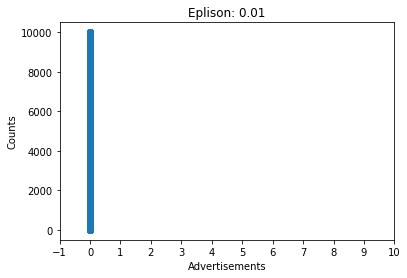

In [49]:
plt.scatter(df['A'], df['C'], alpha=0.5)
plt.xlabel('Advertisements') 
plt.ylabel('Counts')
plt.title(label="Eplison: " + str(eps))
plt.xticks(np.arange(-1, 11, 1.0))
plt.show()

1703
2546
1998
1722
1297
1224
1206


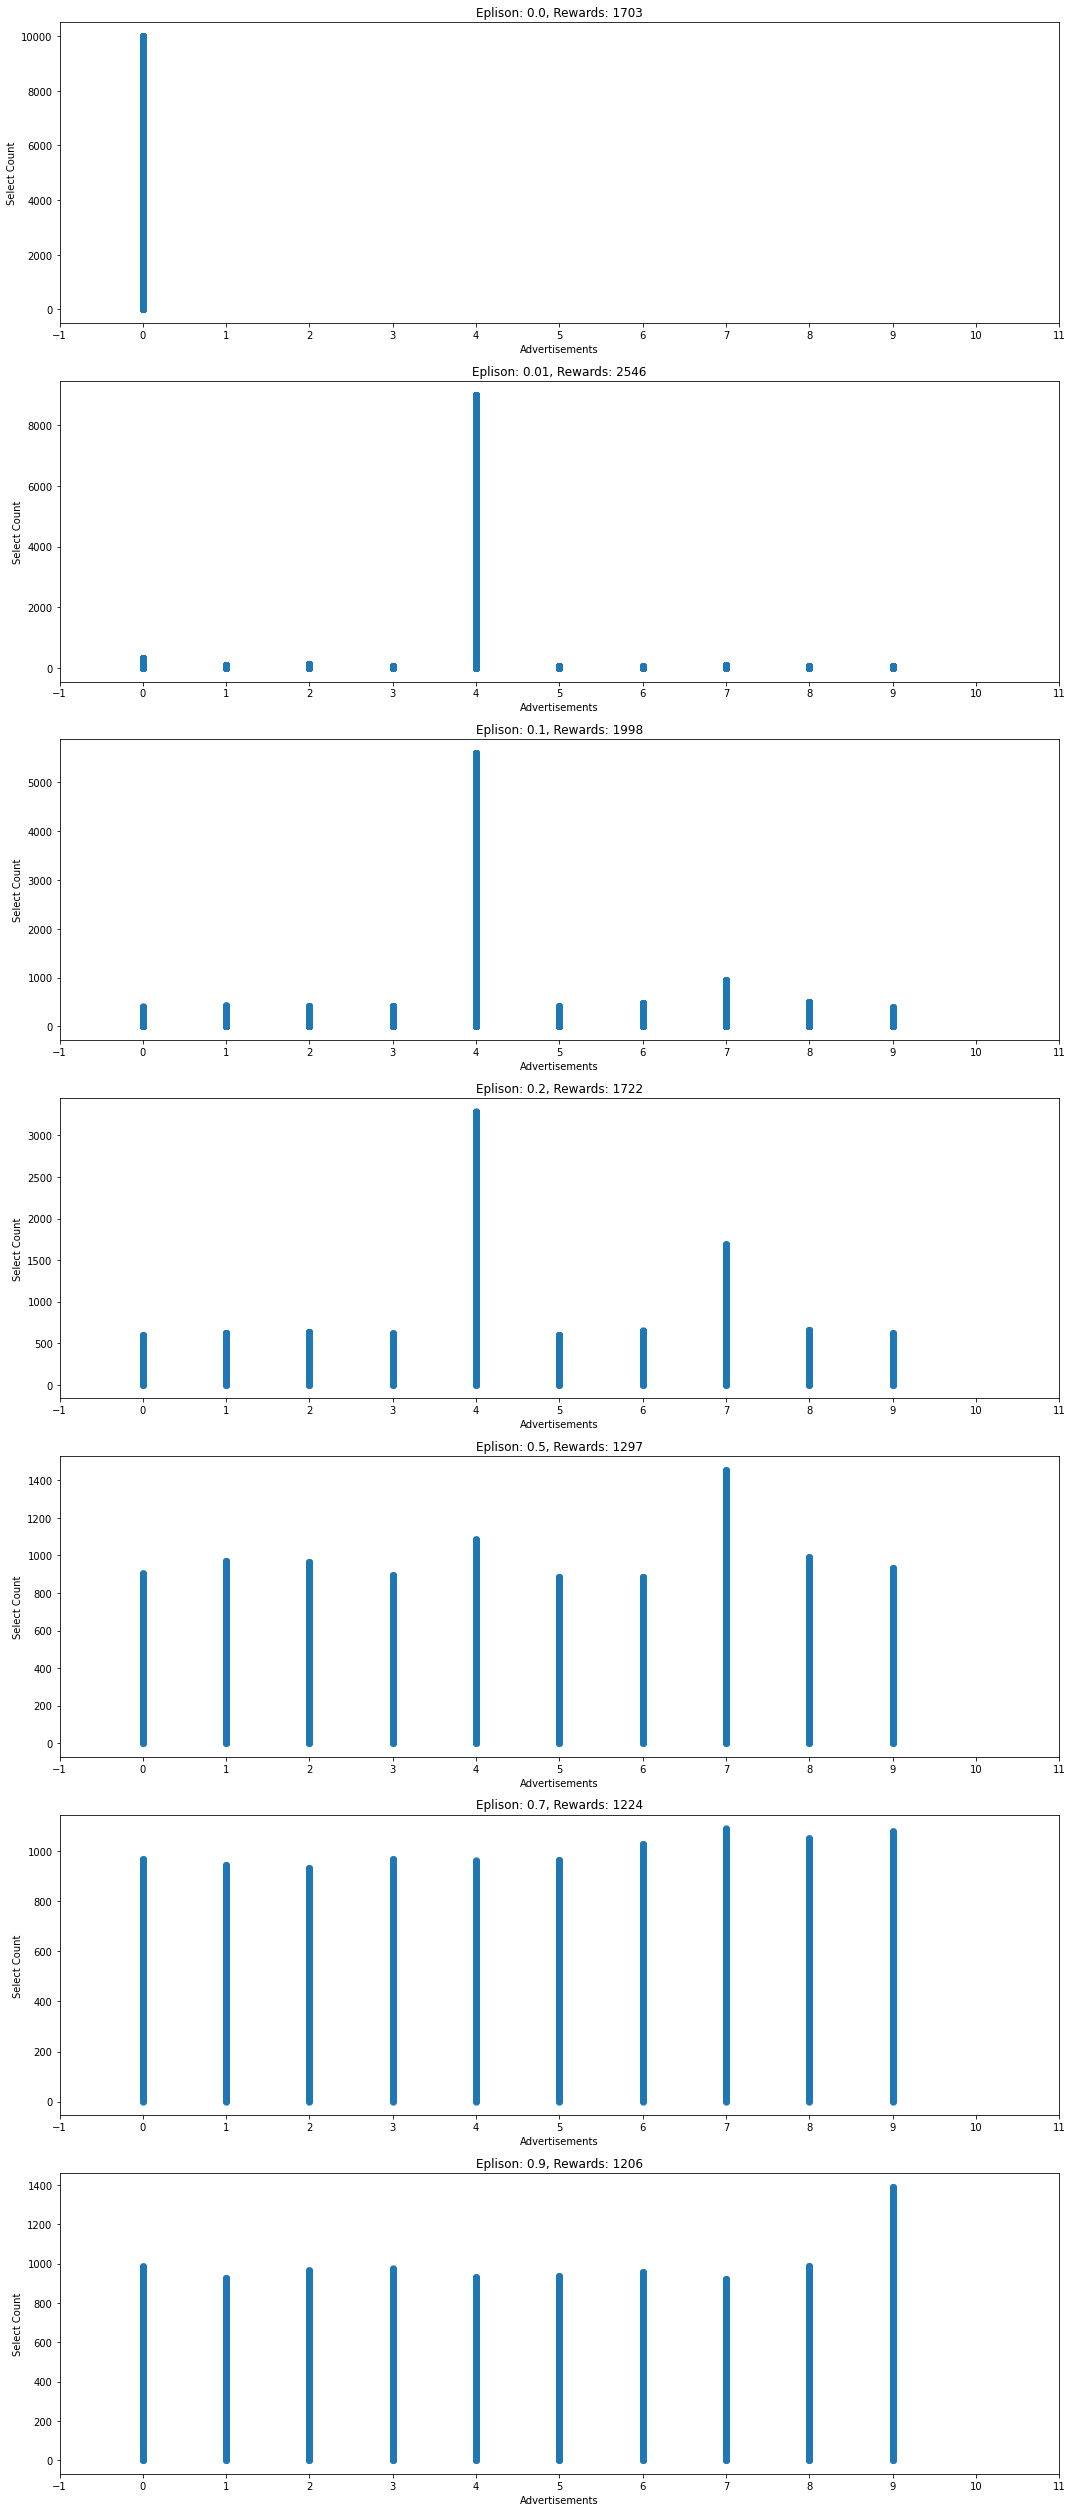

In [57]:
epsilons= [0.0, 0.01, 0.1, 0.2, 0.5, 0.7, 0.9]

fig, axs = plt.subplots(7, figsize=(15,35))


for index,eps in enumerate(epsilons):
    epsilon_result, ads_selected = epsilon_greedy(eps)
    print(epsilon_result)
    
    df = pd.DataFrame(data=ads_selected, columns=['A'])
    df['C'] = df.groupby('A')['A'].cumcount()
    df.sort_values(by=['C', 'A'], inplace=True, ascending=False)
    #print (df)
    
    axs[index].set(xlabel="Advertisements", ylabel="Select Count")
    axs[index].scatter(df['A'], df['C'], alpha=0.5)
    axs[index].title.set_text("Eplison: " + str(eps) + ", Rewards: " + str(epsilon_result))
    #plt.xticks(np.arange(-1, 11, 1.0))
    
plt.setp(axs, xticks=[-1, 0, 1,2,3,4,5,6,7,8,9,10,11])
fig.tight_layout()
plt.show()